# Dogs 'n Cats with ConvNets
This Python notebook is a slight remix of one by François Chollet for his book *Deep Learning With Python*

## In the previous Dogs 'n Cats Notebook 
we downloaded the data then divided it up into a set of image files inside a number of directories. Let's make sure we have those images


In [1]:
import os
base_dir = '/Users/raz/data/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_dir = os.path.join(base_dir, 'test')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')


print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1001
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


This should print:
    
    total training cat images: 1000
    total training dog images: 1000
    total validation cat images: 500
    total validation dog images: 500
    total test cat images: 500
    total test dog images: 500
    
## Building a ConvNet Model
We've already built a small convnet for MNIST in the previous example, so you should be familiar with them. We will reuse the same general structure: our convnet will be a stack of alternated `Conv2D` (with relu activation) and `MaxPooling2D` layers. Here are the steps we would like to do:

1. Create a sequential model
2. Add a `Conv2D` layer. Use 3x3 patches and a depth of 32. The input with be 150 x 150 pixel RGB images (depth of 3)
3. Add a `MaxPooling2D`  with a patch size of 2 x 2. 
4. Add another `Conv2D` layer. Use 3x3 patches and a depth of 64. 
5. Add a `MaxPooling2D`  with a patch size of 2 x 2. 
6. Add another `Conv2D` layer. Use 3x3 patches and a depth of 128.
7. Add a `MaxPooling2D`  with a patch size of 2 x 2. 
8. Add another `Conv2D` layer. Use 3x3 patches and a depth of 128.
9. Add a `MaxPooling2D`  with a patch size of 2 x 2. 
10. Finish up by flattening and adding a dense layer


In [3]:
# ADD YOUR CODE HERE




model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



### Verify that we did it right. 
Let's check by using the summary method:

In [4]:
model.summary()

You should see:
    
    
		_________________________________________________________________
		Layer (type)                 Output Shape              Param #   
		=================================================================
		conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
		_________________________________________________________________
		max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
		_________________________________________________________________
		conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
		_________________________________________________________________
		max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
		_________________________________________________________________
		conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
		_________________________________________________________________
		max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
		_________________________________________________________________
		conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
		_________________________________________________________________
		max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
		_________________________________________________________________
		flatten_1 (Flatten)          (None, 6272)              0         
		_________________________________________________________________
		dense_1 (Dense)              (None, 512)               3211776   
		_________________________________________________________________
		dense_2 (Dense)              (None, 1)                 513       
		=================================================================
		Total params: 3,453,121
		Trainable params: 3,453,121
		Non-trainable params: 0
        
# Compile the Model

Set the parameters:

* set loss to be binary_crossentropy
* use `optimizers.RMSprop(lr=1e-4)` as the optimizer
* for metrics use `acc`


# Data Preprocessing
Use the same data preprocessing steps we used for the original Dogs n' Cats. You should create a `train_generator` and a `validation_generator`. 

## Fit the model
Use `fit_generator`. Don't forget to save the history.

1. Use 30 epochs
2. Each with 100 steps
3. Use the `validation_generator` as the validation data
4. Set the validation steps to 50.


It's a good practice to save our model

In [7]:
model.save('cats_and_dogs_small_1.h5')

Let's plot the loss and accuracy:

## Look at those plots. 
What do they indicate? Seriously, spend a few minutes looking at them. Please.

# Using data augmentation

This section is directly from François Chollet 

Overfitting is caused by having too few samples to learn from, rendering us unable to train a model able to generalize to new data. Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would never overfit. Data augmentation takes the approach of generating more training data from existing training samples, by "augmenting" the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, our model would never see the exact same picture twice. This helps the model get exposed to more aspects of the data and generalize better.
In Keras, this can be done by configuring a number of random transformations to be performed on the images read by our ImageDataGenerator instance. Let's get started with an example:


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

Using TensorFlow backend.


These are just a few of the options available (for more, see the Keras documentation). Let's quickly go over what we just wrote:

* `rotation_range` is a value in degrees (0-180), a range within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures 
vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal 
asymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

Let's take a look at our augmented images:

['/Users/raz/data/cats_and_dogs_small/train/dogs/dog.775.jpg', '/Users/raz/data/cats_and_dogs_small/train/dogs/dog.761.jpg', '/Users/raz/data/cats_and_dogs_small/train/dogs/dog.991.jpg', '/Users/raz/data/cats_and_dogs_small/train/dogs/dog.749.jpg', '/Users/raz/data/cats_and_dogs_small/train/dogs/dog.985.jpg', '/Users/raz/data/cats_and_dogs_small/train/dogs/dog.952.jpg', '/Users/raz/data/cats_and_dogs_small/train/dogs/dog.946.jpg', '/Users/raz/data/cats_and_dogs_small/train/dogs/dog.211.jpg', '/Users/raz/data/cats_and_dogs_small/train/dogs/dog.577.jpg', '/Users/raz/data/cats_and_dogs_small/train/dogs/dog.563.jpg', '/Users/raz/data/cats_and_dogs_small/train/dogs/dog.205.jpg', '/Users/raz/data/cats_and_dogs_small/train/dogs/dog.239.jpg', '/Users/raz/data/cats_and_dogs_small/train/dogs/dog.588.jpg', '/Users/raz/data/cats_and_dogs_small/train/dogs/dog.365.jpg', '/Users/raz/data/cats_and_dogs_small/train/dogs/dog.403.jpg', '/Users/raz/data/cats_and_dogs_small/train/dogs/dog.417.jpg', '/Users

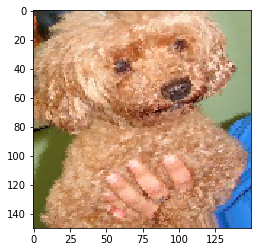

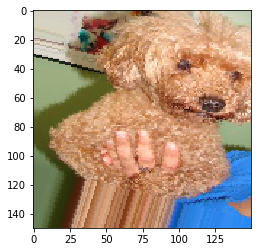

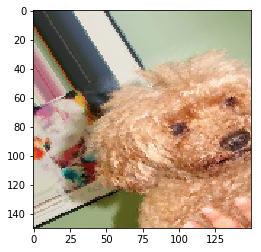

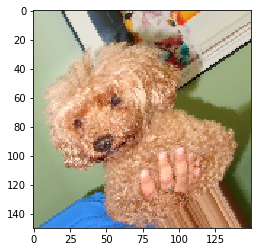

In [18]:
import matplotlib.pyplot as plt 
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]

# We pick one image to "augment"
#print(os.listdir(train_dogs_dir).index('dog.788.jpg'))
img_path = fnames[107]
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### For fun
Find a dog or cat picture you like and perform augmentation on it. I perused my dogs directory and liked `dogs.788.jpg`. A sensible thing would be to hard-code that picture in the above code, but I used the commented out line to find the index of that image and plugged that index number into the code. (François Chollet had originally --gasp -- a cat picture! Imagine that) I am hoping this will help you understand the code a bit more.

If we train a new network using this data augmentation configuration, our network will never see twice the same input. However, the inputs 
that it sees are still heavily intercorrelated, since they come from a small number of original images -- we cannot produce new information, 
we can only remix existing information. As such, this might not be quite enough to completely get rid of overfitting. To further fight 
overfitting, we will also add a Dropout layer to our model using: 

     augmented_model.add(layers.Dropout(0.5))

between the flatten layer and the densely-connected classifier. Copy your model declaration from above and add this line.

Sweet! Here is the code for the augmented data generator:

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Fit the model
Now we will use these new generators to fit the model.

Use `fit_generator`. Don't forget to save the history.

1. Use 100 epochs
2. Each with 100 steps
3. Use the `validation_generator` as the validation data
4. Set the validation steps to 50

Let's save our model -- we will be using it in a later lab on convnet visualization.

### Let's plot our results again
One plot showing the training and validation accuracy, another showing training and validation loss.


# Questions

1. What do these graphs show? How are they different from the graphs in the previous section?
2. What was the point of data augmentation? 
   1. How did it help?
   2. When would we use it?
3. In the very first codeblock of this notebook we created training, validation and test sets. 
   1. Why do we need them?
   2. What does each one do?
   3. Why can't we use the training set for validation?
4. What is a dropout layer?